In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import requests
from bs4 import BeautifulSoup
import geopandas as gpd
#from prettytable import PrettyTable

In [2]:
url = 'https://www.mohfw.gov.in/'
# make a GET request to fetch the raw HTML content
web_content = requests.get(url).content
# parse the html content
soup = BeautifulSoup(web_content, "html.parser")
# remove any newlines and extra spaces from left and right
extract_contents = lambda row: [x.text.replace('\n', '') for x in row]
# find all table rows and data cells within
stats = [] 
all_rows = soup.find_all('tr')
for row in all_rows:
    stat = extract_contents(row.find_all('td')) 
# notice that the data that we require is now a list of length 5
    if len(stat) == 5:
        stats.append(stat)
#now convert the data into a pandas dataframe for further processing
new_cols = ["Sr.No", "States/UT","Confirmed","Recovered","Deceased"]
state_data = pd.DataFrame(data = stats, columns = new_cols)
state_data.head()

,Sr.No,States/UT,Confirmed,Recovered,Deceased


In [3]:
state_data["Confirmed"] = state_data["Confirmed"].map(int)
state_data["Recovered"] = state_data["Recovered"].map(int)
state_data["Deceased"] = state_data["Deceased"].map(int)

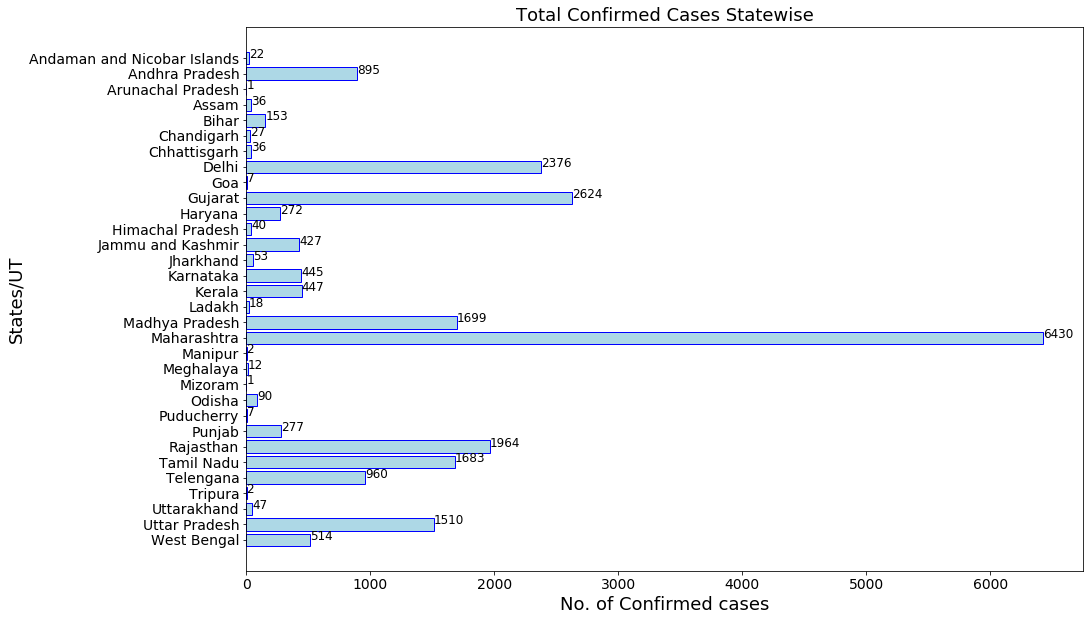

In [4]:
#Bar Chart
#sns.set_style("ticks")
plt.figure(figsize = (15,10))
plt.barh(state_data["States/UT"],    state_data["Confirmed"].map(int),align = "center", color = "lightblue", edgecolor = "blue")
plt.xlabel("No. of Confirmed cases", fontsize = 18)
plt.ylabel("States/UT", fontsize = 18)
plt.gca().invert_yaxis()
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 14)
plt.title("Total Confirmed Cases Statewise", fontsize = 18 )
for index, value in enumerate(state_data["Confirmed"]):
    plt.text(value, index, str(value), fontsize = 12)
plt.show()


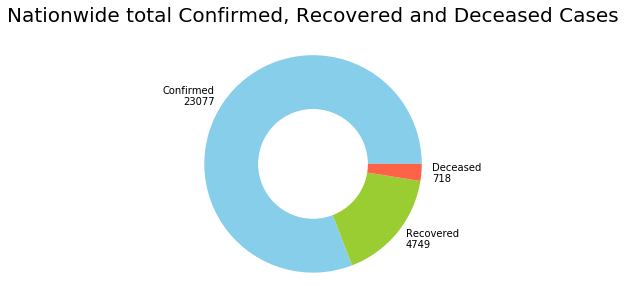

In [5]:
#Pie Chart
group_size = [sum(state_data["Confirmed"]),
              sum(state_data["Recovered"]),
              sum(state_data["Deceased"])]
group_labels = ["Confirmed\n" + str(sum(state_data["Confirmed"])),
                "Recovered\n" + str(sum(state_data["Recovered"])),
                "Deceased\n" + str(sum(state_data["Deceased"]))]
custom_colors = ["skyblue","yellowgreen","tomato"]
plt.figure(figsize = (5,5))
plt.pie(group_size, labels = group_labels, colors = custom_colors)
central_circle = plt.Circle((0,0), 0.5, color = "white")
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc("font", size = 12)
plt.title("Nationwide total Confirmed, Recovered and Deceased Cases", fontsize = 20)
plt.show()

In [6]:
#Chloropleth map of the total Confirmed Cases
# reading the shape file of map of India in GeoDataFrame
map_data = gpd.read_file("C:/Users/cmreddy koduru/Downloads/Igismap/Indian_States.shp")
map_data.rename(columns = {"st_nm":"States/UT"}, inplace = True)
map_data.head()

,States/UT,geometry
0,Andaman & Nicobar Island,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2..."
1,Arunanchal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432..."
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26..."
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24..."
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623..."


In [7]:
#Correcting spellings of states in map_data
map_data["States/UT"] = map_data["States/UT"].str.replace("&","and")
map_data["States/UT"].replace("Arunanchal Pradesh",
                              "Arunachal Pradesh", inplace = True)
map_data["States/UT"].replace("Telangana", 
                              "Telengana", inplace = True)
map_data["States/UT"].replace("NCT of Delhi", 
                              "Delhi", inplace = True)
map_data['States/UT'].replace('Andaman and Nicobar Island', 
                              'Andaman and Nicobar Islands', 
                               inplace = True)

In [8]:
import numpy as np
#Merge the two dataframes state_data and map_data
merged_data = pd.merge(map_data, state_data, how = "left", on = "States/UT")
merged_data.fillna(np.nan, inplace = True)
merged_data.drop("Sr.No", axis = 1, inplace = True)
merged_data.head()

,States/UT,geometry,Confirmed,Recovered,Deceased
0,Andaman and Nicobar Islands,"MULTIPOLYGON (((93.71976 7.20707, 93.71909 7.2...",22.0,11.0,0.0
1,Arunachal Pradesh,"POLYGON ((96.16261 29.38078, 96.16860 29.37432...",1.0,1.0,0.0
2,Assam,"MULTIPOLYGON (((89.74323 26.30362, 89.74290 26...",36.0,19.0,1.0
3,Bihar,"MULTIPOLYGON (((84.50720 24.26323, 84.50355 24...",153.0,46.0,2.0
4,Chandigarh,"POLYGON ((76.84147 30.75996, 76.83599 30.73623...",27.0,14.0,0.0


F:\Anaconda\lib\site-packages\matplotlib\colors.py:527: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


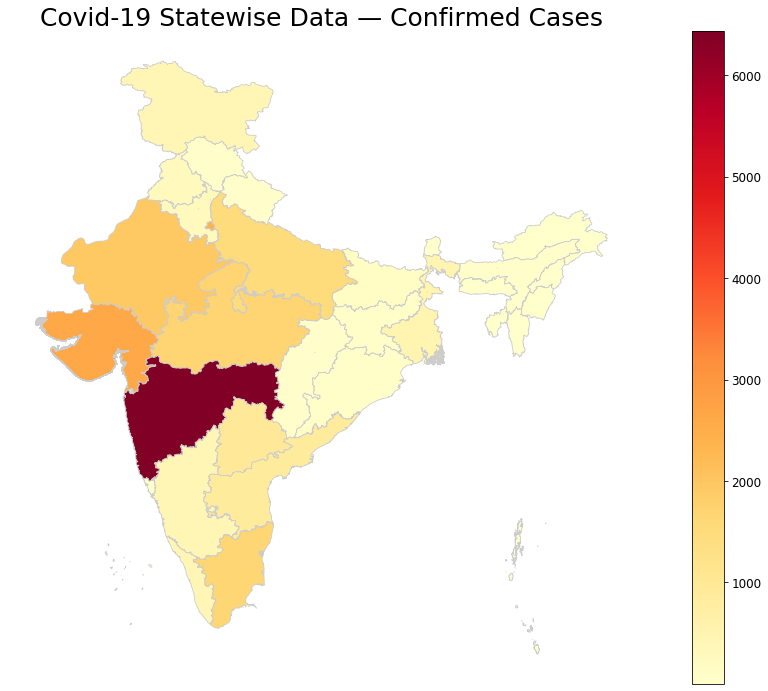

In [9]:
fig, ax = plt.subplots(1, figsize=(20, 12))
ax.axis("off")
ax.set_title("Covid-19 Statewise Data — Confirmed Cases", 
             fontdict =  {"fontsize": "25", "fontweight" : "3"})
merged_data.plot(column = "Confirmed", cmap="YlOrRd", 
                 linewidth=0.8, ax=ax, edgecolor="0.8", 
                 legend = True)
plt.show()